In [142]:
from utils.read_data import DataConverter

import os
import random
import shutil

import cv2
import matplotlib.pyplot as plt

## XML -> YOLO format

In [24]:
project_path = "/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project"

train_path=os.path.join(project_path, "scratch/svhn-voc-annotation-format/annotation/train")
test_path=os.path.join(project_path, "scratch/svhn-voc-annotation-format/annotation/test")

train_annotation_path=os.path.join(project_path, "data/google_digit_data/train/labels")
test_annotation_path=os.path.join(project_path, "data/google_digit_data/test/labels")

print(train_path)
print(test_path)

print(train_annotation_path)
print(test_annotation_path)

/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/scratch/svhn-voc-annotation-format/annotation/train
/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/scratch/svhn-voc-annotation-format/annotation/test
/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/google_digit_data/train/labels
/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/google_digit_data/test/labels


In [28]:
%%time
data_converter = DataConverter()
#initialize the class_label dictionary
data_converter.class_label = {'1':1,
                              '2':2,
                              '3':3,
                              '4':4,
                              '5':5,
                              '6':6,
                              '7':7,
                              '8':8,
                              '9':9,
                              '10':0}

data_converter.convert_xml_data(folder_path = train_path,
                               output_path = train_annotation_path)
data_converter.convert_xml_data(folder_path = test_path,
                               output_path = test_annotation_path)

CPU times: user 8.16 s, sys: 16.3 s, total: 24.4 s
Wall time: 31.5 s


## Test data conversion

In [87]:
test_image = cv2.imread(os.path.join(project_path, "data/google_digit_data/train/images/200.png"))

In [88]:
test_image.shape

(56, 188, 3)

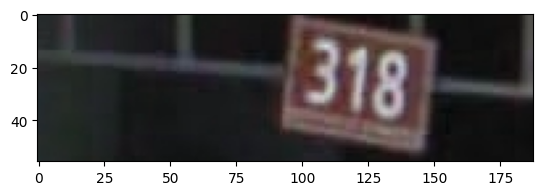

In [89]:
plt.imshow(test_image)

In [90]:
with open(os.path.join(project_path, "data/google_digit_data/train/labels/200.txt"), "r") as f:
    sample_annotation = f.read()
    f.close()
    
height=test_image.shape[0]
width=test_image.shape[1]
          
updated_annotation = []
for i in sample_annotation.split('\n')[:-1]:
    
    temp = i.split(' ')
    print(temp)
    temp[1] = round(float(temp[1])*width)
    temp[2] = round(float(temp[2])*height)
    temp[3] = round(float(temp[3])*width)
    temp[4] = round(float(temp[4])*height)
    
    # x min
    x_min = int(temp[1]-temp[3]/2)
    x_max = int(temp[1]+temp[3]/2)
    y_min = int(temp[2]-temp[4]/2)
    y_max = int(temp[2]+temp[4]/2)
    
    updated_annotation.append([temp[0], x_min,x_max,y_min,y_max])

['3', '0.569149', '0.357143', '0.106383', '0.571429']
['1', '0.643617', '0.410714', '0.085106', '0.571429']
['8', '0.718085', '0.464286', '0.095745', '0.571429']


In [91]:
print(updated_annotation)

[['3', 97, 117, 4, 36], ['1', 113, 129, 7, 39], ['8', 126, 144, 10, 42]]


In [92]:
for i in updated_annotation:
    cv2.rectangle(test_image, pt1=(i[1],i[4]), pt2=(i[2],i[3]), color=(0,255,0), thickness=1)

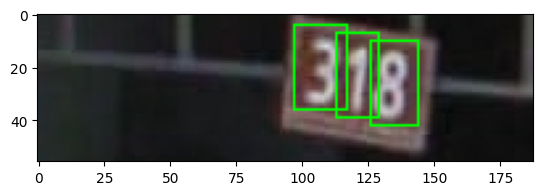

In [93]:
plt.imshow(test_image)

## Create valid split in the train dir

In [124]:
train_images_path = os.path.join(project_path, "data/google_digit_data/train/images/")
train_labels_path = os.path.join(project_path, "data/google_digit_data/train/labels/")

valid_images_path = os.path.join(project_path, "data/google_digit_data/valid/images/")
valid_labels_path = os.path.join(project_path, "data/google_digit_data/valid/labels/")

In [125]:
print(train_images_path)
print(train_labels_path)
print(valid_images_path)
print(valid_labels_path)

/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/google_digit_data/train/images/
/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/google_digit_data/train/labels/
/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/google_digit_data/valid/images/
/Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/google_digit_data/valid/labels/


In [126]:
train_images_list = sorted(os.listdir(train_images_path))
train_labels_list = sorted(os.listdir(train_labels_path))

In [127]:
print(len(train_images_list))
print(len(train_labels_list))
print(train_images_list[0:5])
print(train_labels_list[0:5])

33402
33402
['1.png', '10.png', '100.png', '1000.png', '10000.png']
['1.txt', '10.txt', '100.txt', '1000.txt', '10000.txt']


In [134]:
nums = list(range(0, len(train_images_list)))
random.shuffle(nums)
valid_idx = nums[:3000]
train_idx = nums[3000:]

In [135]:
print(len(valid_idx))
print(len(set(valid_idx)))
print(len(train_idx))
print(len(set(train_idx)))
print(valid_idx[0:5])

3000
3000
30402
30402
[2893, 14667, 18152, 16358, 12179]


In [139]:
# move train images/labels to valid folder
for idx_v in valid_idx:
    shutil.copy(os.path.join(train_images_path, train_images_list[idx_v]), os.path.join(valid_images_path , train_images_list[idx_v]))
    shutil.copy(os.path.join(train_labels_path, train_labels_list[idx_v]), os.path.join(valid_labels_path , train_labels_list[idx_v]))    


In [141]:
# delete corresponding data from training

for idx_v in valid_idx:
    os.remove(os.path.join(train_images_path, train_images_list[idx_v]))
    os.remove(os.path.join(train_labels_path, train_labels_list[idx_v]))

## Remove 10,000 images from training (due to size limit in the cluster)

In [146]:
# reload
train_images_list = sorted(os.listdir(train_images_path))
train_labels_list = sorted(os.listdir(train_labels_path))

In [152]:
extra_images_path = os.path.join(project_path, "data/google_digit_data/extra/images/")
extra_labels_path = os.path.join(project_path, "data/google_digit_data/extra/labels/")

In [153]:
len(train_images_list)

30402

In [154]:
nums = list(range(0, len(train_images_list)))
random.shuffle(nums)
keep_idx = nums[:10000]
remove_idx = nums[10000:]

In [155]:
print(len(keep_idx))
print(len(remove_idx))

10000
20402


In [157]:
# move train images/labels to valid folder
for idx_v in remove_idx:
    shutil.copy(os.path.join(train_images_path, train_images_list[idx_v]), os.path.join(extra_images_path , train_images_list[idx_v]))
    shutil.copy(os.path.join(train_labels_path, train_labels_list[idx_v]), os.path.join(extra_labels_path , train_labels_list[idx_v]))    


In [158]:
# delete corresponding data from training
for idx_v in remove_idx:
    os.remove(os.path.join(train_images_path, train_images_list[idx_v]))
    os.remove(os.path.join(train_labels_path, train_labels_list[idx_v]))